# House Price Prediction using Ridge and Lasso Regression

The solution is divided into the following sections:

- Data understanding and exploration
- Data cleaning
- Data preparation
- Model building and evaluation



## 1. Data Understanding and Exploration

Let's first have a look at the dataset and understand the size, attribute names etc.



In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
 
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score

import os

# hide warnings
import warnings
warnings.filterwarnings('ignore')

In [4]:
#Read the data given
Houses= pd.read_csv('train.csv')

In [5]:
print(Houses.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [6]:
Houses.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [7]:
#Removing columns which are significantly null and not so important
#Id column not required for analysis so need to deleting that as well
Houses = Houses.drop(['Id','Alley','FireplaceQu', 'PoolQC','Fence','MiscFeature'], axis=1)
Houses.shape

(1460, 75)

In [8]:
Houses.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,12,2008,WD,Normal,250000


In [9]:
Houses['ScreenPorch'].value_counts()

0      1344
192       6
120       5
224       5
189       4
       ... 
291       1
260       1
385       1
156       1
40        1
Name: ScreenPorch, Length: 76, dtype: int64

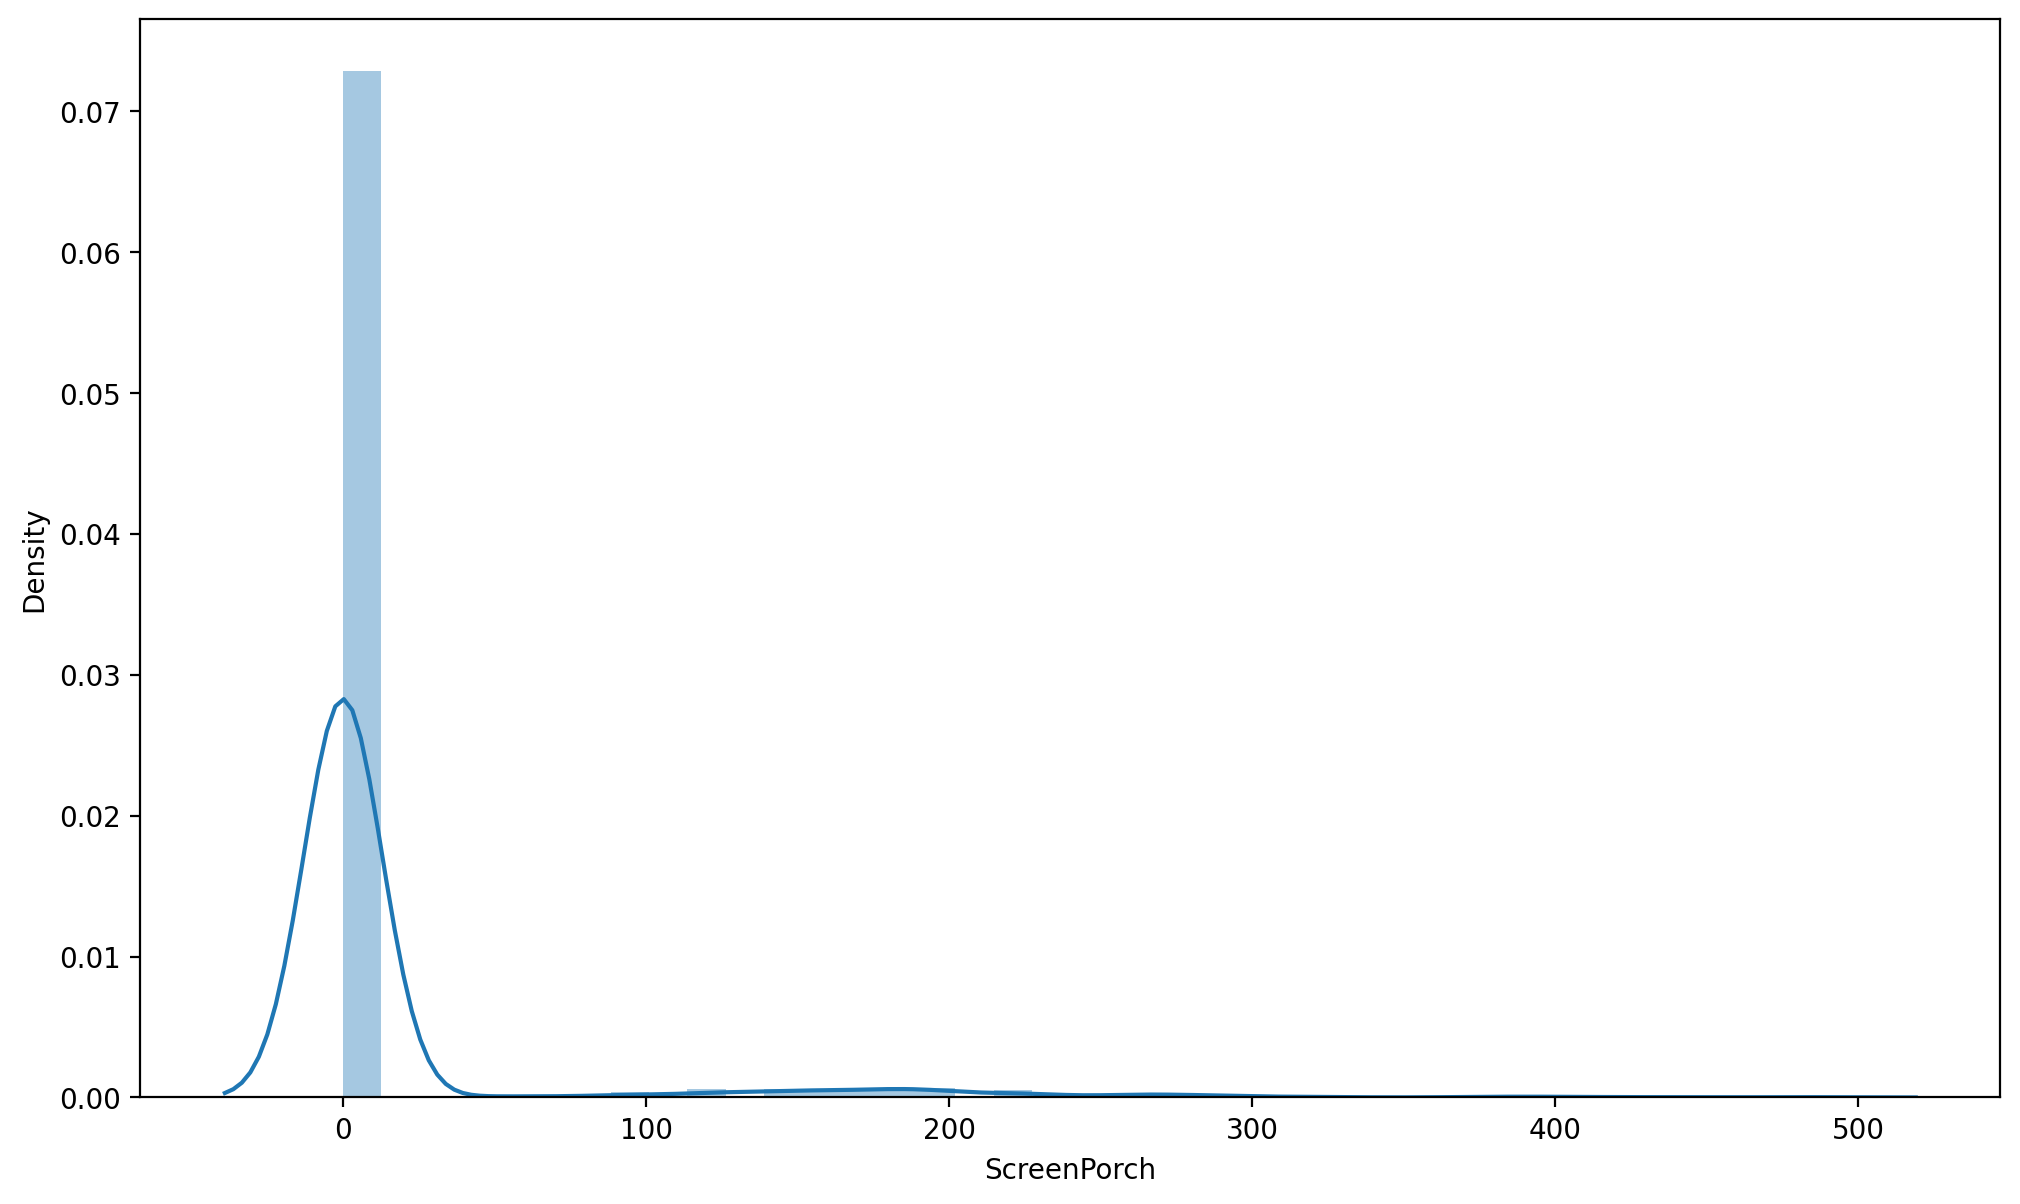

In [10]:
sns.distplot(Houses['ScreenPorch'])
plt.show()

In [11]:
Houses['3SsnPorch'].value_counts()

0      1436
168       3
144       2
180       2
216       2
290       1
153       1
96        1
23        1
162       1
182       1
196       1
320       1
245       1
238       1
508       1
140       1
130       1
407       1
304       1
Name: 3SsnPorch, dtype: int64

In [12]:
Houses['EnclosedPorch'].value_counts()

0      1252
112      15
96        6
192       5
144       5
       ... 
54        1
136       1
148       1
140       1
99        1
Name: EnclosedPorch, Length: 120, dtype: int64

In [13]:
Houses['PoolArea'].value_counts()

0      1453
512       1
648       1
576       1
555       1
480       1
519       1
738       1
Name: PoolArea, dtype: int64

In [14]:
Houses['MiscVal'].value_counts()

0        1408
400        11
500         8
700         5
450         4
600         4
2000        4
1200        2
480         2
15500       1
800         1
350         1
3500        1
1300        1
54          1
620         1
560         1
1400        1
8300        1
1150        1
2500        1
Name: MiscVal, dtype: int64

In [15]:
#deleting columns with more than 80 percent zero values
Houses = Houses.drop(['EnclosedPorch','3SsnPorch','ScreenPorch','PoolArea','MiscVal'], axis=1)
Houses.shape

(1460, 70)

In [16]:
Houses.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,TA,TA,Y,0,61,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,TA,TA,Y,298,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,TA,TA,Y,0,42,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,TA,TA,Y,0,35,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,TA,TA,Y,192,84,12,2008,WD,Normal,250000


In [17]:
#checking for single value column
Houses.columns[Houses.nunique() <= 1]

Index([], dtype='object')

In [18]:
Houses.tail()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1455,60,RL,62.0,7917,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,TA,TA,Y,0,40,8,2007,WD,Normal,175000
1456,20,RL,85.0,13175,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,TA,TA,Y,349,0,2,2010,WD,Normal,210000
1457,70,RL,66.0,9042,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,TA,TA,Y,0,60,5,2010,WD,Normal,266500
1458,20,RL,68.0,9717,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,TA,TA,Y,366,0,4,2010,WD,Normal,142125
1459,20,RL,75.0,9937,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,TA,TA,Y,736,68,6,2008,WD,Normal,147500


In [19]:
#finding any column with all unique values
Houses.columns[Houses.nunique() >= 1400]

Index([], dtype='object')

In [20]:
#removing columns which represent indirectly same data of existing coulmns
#removing columns which does not influence analysis

Houses = Houses.drop(['GarageCars','GarageCond','MSSubClass','MoSold','YrSold','Electrical','Exterior2nd','Condition2'], axis=1)
Houses.shape

(1460, 62)

#### Data Exploration

Exploring independent and dependent data set, there dependency, correlation



In [21]:
 Houses['SaleType'].value_counts()

WD       1267
New       122
COD        43
ConLD       9
ConLI       5
ConLw       5
CWD         4
Oth         3
Con         2
Name: SaleType, dtype: int64

In [22]:
#sale type has more than 70 percentsingle value so deleting the column as it will not impact the analysis much
Houses = Houses.drop(['SaleType'], axis=1)
Houses.shape

(1460, 61)

In [23]:
Houses.head()

,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,...,GarageType,GarageYrBlt,GarageFinish,GarageArea,GarageQual,PavedDrive,WoodDeckSF,OpenPorchSF,SaleCondition,SalePrice
0,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,...,Attchd,2003.0,RFn,548,TA,Y,0,61,Normal,208500
1,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,...,Attchd,1976.0,RFn,460,TA,Y,298,0,Normal,181500
2,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,...,Attchd,2001.0,RFn,608,TA,Y,0,42,Normal,223500
3,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,...,Detchd,1998.0,Unf,642,TA,Y,0,35,Abnorml,140000
4,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,...,Attchd,2000.0,RFn,836,TA,Y,192,84,Normal,250000


In [24]:
Houses['LandSlope'].value_counts()

Gtl    1382
Mod      65
Sev      13
Name: LandSlope, dtype: int64

In [25]:
# all numeric (float and int) variables in the dataset
Houses_numeric = Houses.select_dtypes(include=['float64', 'int64'])
Houses_numeric.head()

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageArea,WoodDeckSF,OpenPorchSF,SalePrice
0,65.0,8450,7,5,2003,2003,196.0,706,0,150,...,1,3,1,8,0,2003.0,548,0,61,208500
1,80.0,9600,6,8,1976,1976,0.0,978,0,284,...,0,3,1,6,1,1976.0,460,298,0,181500
2,68.0,11250,7,5,2001,2002,162.0,486,0,434,...,1,3,1,6,1,2001.0,608,0,42,223500
3,60.0,9550,7,5,1915,1970,0.0,216,0,540,...,0,3,1,7,1,1998.0,642,0,35,140000
4,84.0,14260,8,5,2000,2000,350.0,655,0,490,...,1,4,1,9,1,2000.0,836,192,84,250000


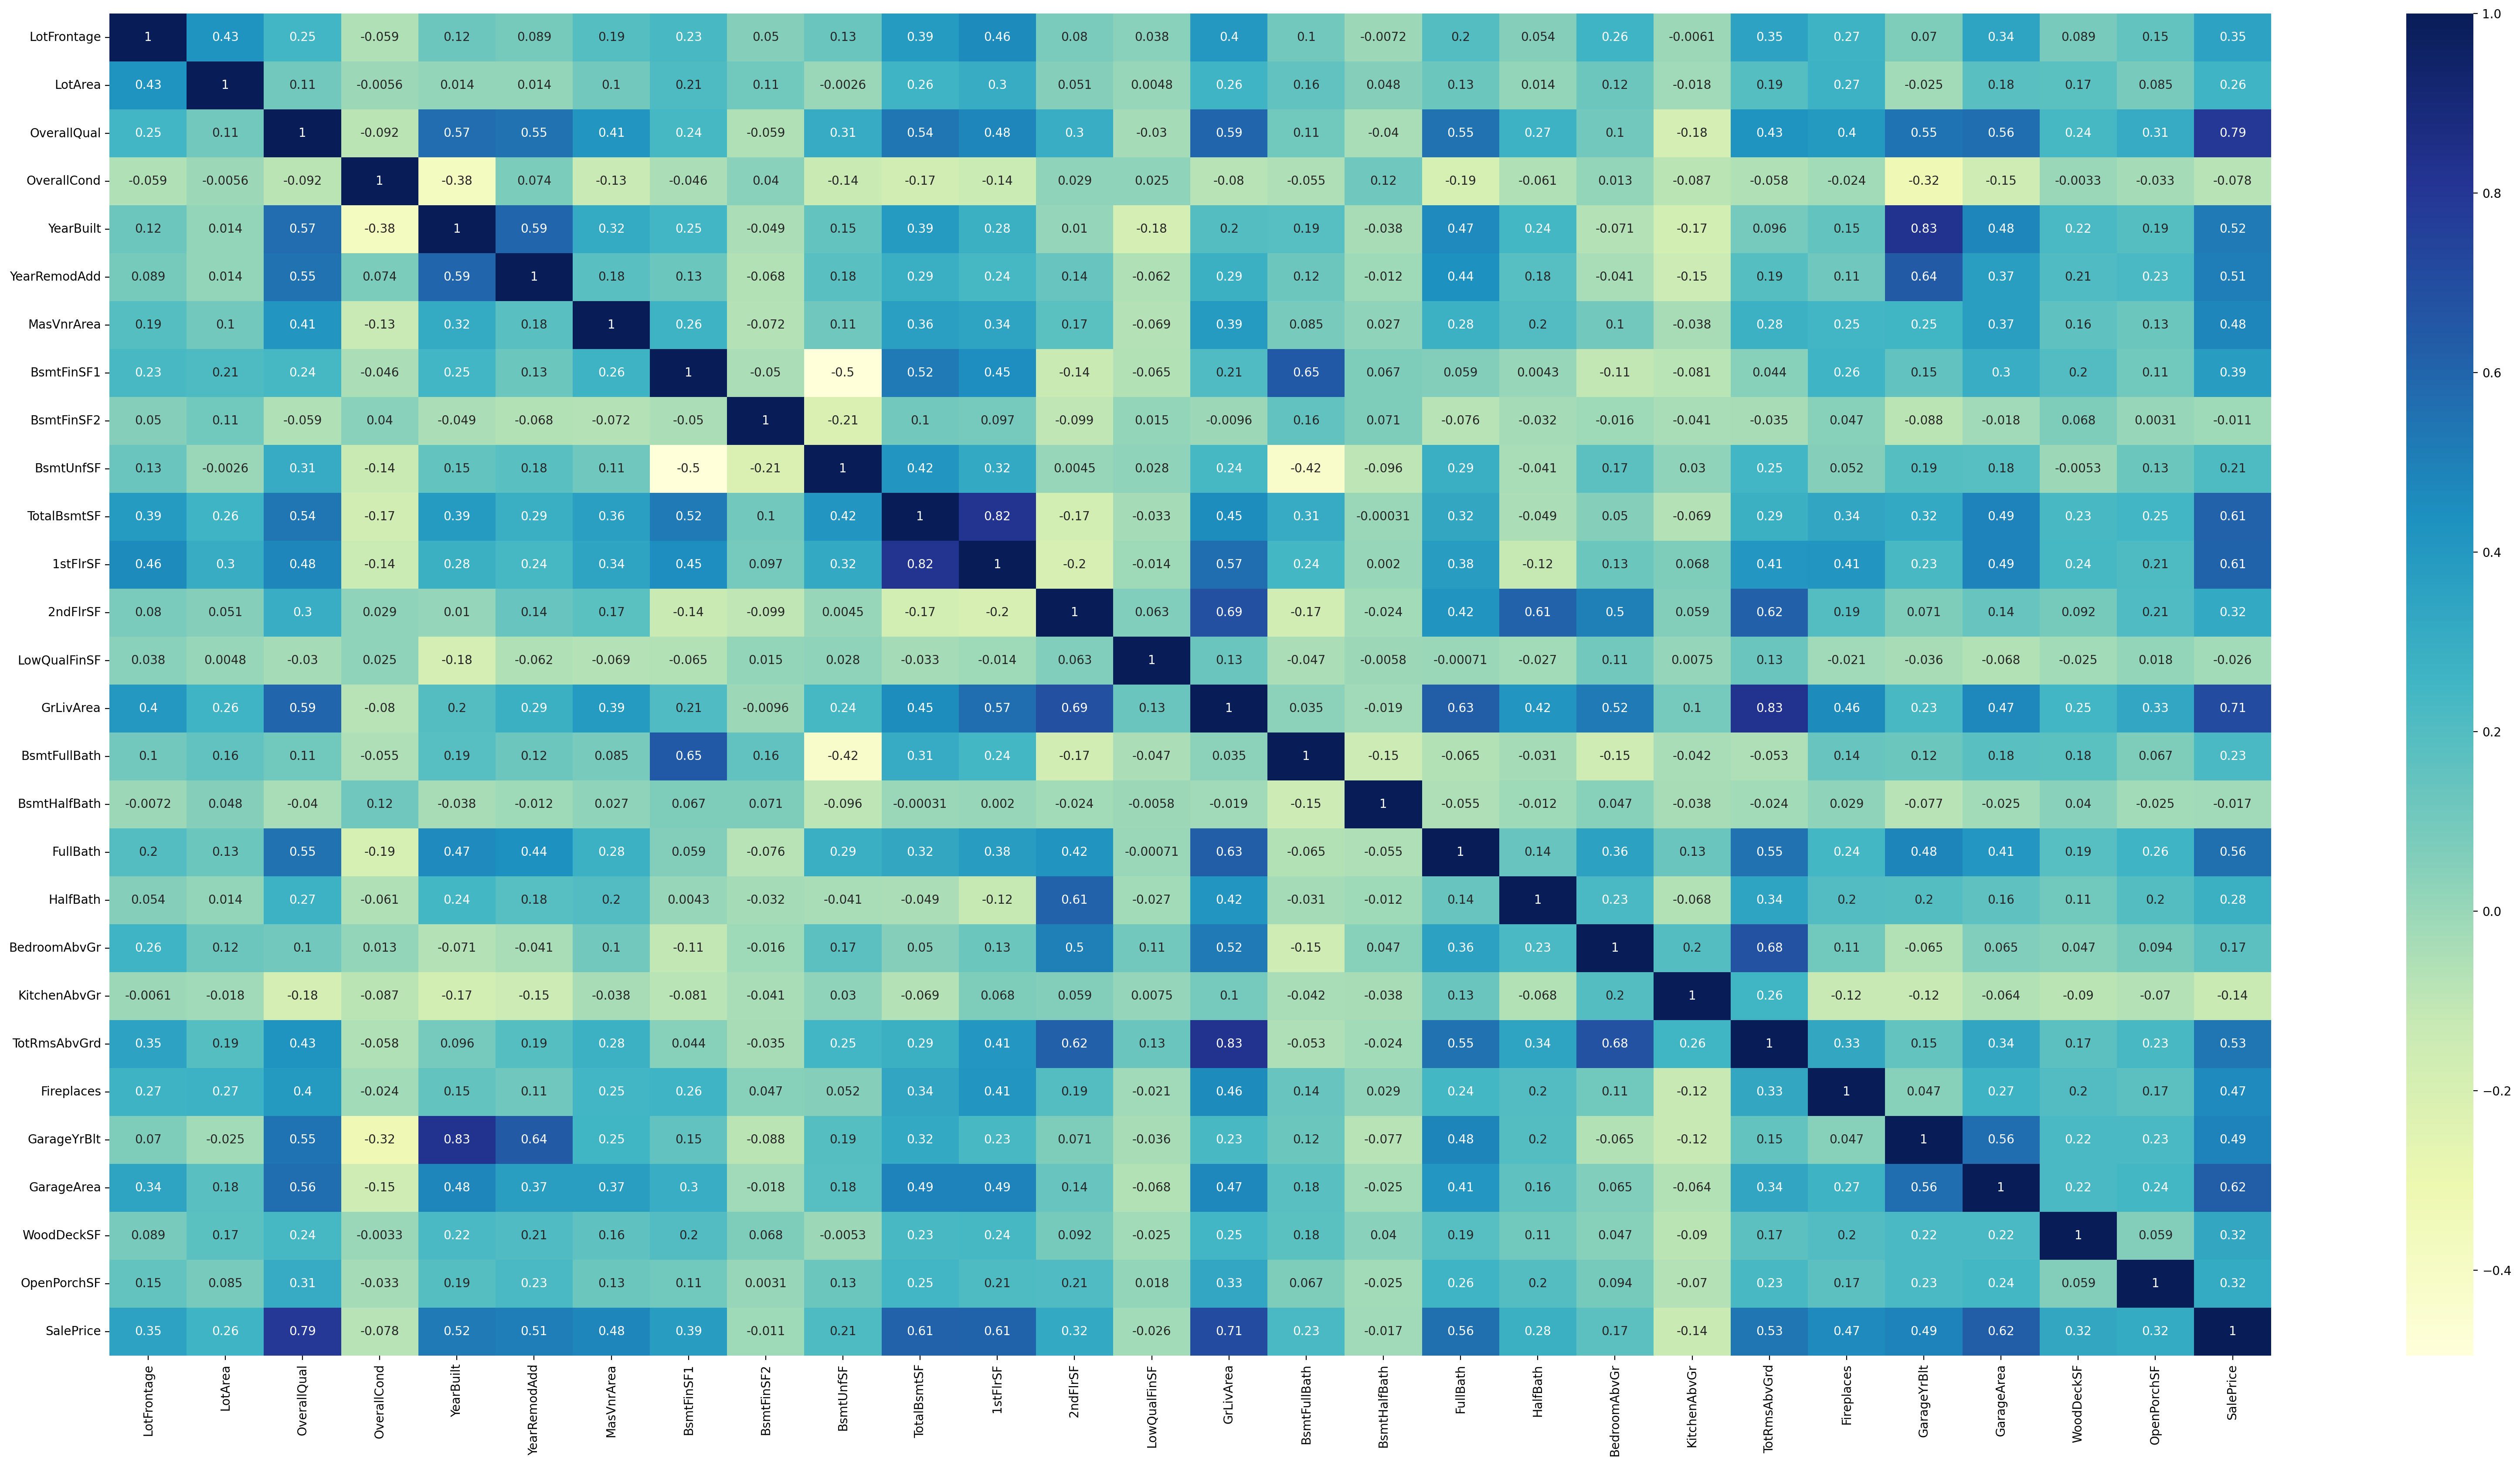

In [26]:
# correlation matrix
corr = Houses_numeric.corr()
# plotting correlations on a heatmap

# figure size
plt.figure(figsize=(40,20))

# heatmap
sns.heatmap(corr, cmap="YlGnBu", annot=True)
plt.show()

HeatMap shows some useful insights about dependent and independent variable

Target/Dependent variable 'SalePrice' has very low correlation with

- OverallCond
- BsmtFinSF2
- LowQualFinSF
- BsmtHalfBath
- KitchenAbvGr

Target Variable is highly correlated with 

- OveralQual
- GrLivArea

Few Independent variables are highly correlated to each other



In [27]:
#deleting very low correlated variables

Houses = Houses.drop(['OverallCond','BsmtFinSF2','LowQualFinSF','BsmtHalfBath','KitchenAbvGr'],axis=1)
Houses.shape

(1460, 56)

Some independent variables mentioned below are highly correlated to each other and they carry almost same information, so deleting one of them

- GarageYrBlt and YearBuilt
- TotRmsAbvGrd and GrLivArea  
- TotalBsmtSF and 1stFlrSF



In [28]:
Houses = Houses.drop(['GarageYrBlt','TotRmsAbvGrd','TotalBsmtSF'],axis=1)
Houses.shape

(1460, 53)

In [29]:
Houses.head()

,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,...,Fireplaces,GarageType,GarageFinish,GarageArea,GarageQual,PavedDrive,WoodDeckSF,OpenPorchSF,SaleCondition,SalePrice
0,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,...,0,Attchd,RFn,548,TA,Y,0,61,Normal,208500
1,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,...,1,Attchd,RFn,460,TA,Y,298,0,Normal,181500
2,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,...,1,Attchd,RFn,608,TA,Y,0,42,Normal,223500
3,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,...,1,Detchd,Unf,642,TA,Y,0,35,Abnorml,140000
4,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,...,1,Attchd,RFn,836,TA,Y,192,84,Normal,250000


## 2.Data Cleaning



In [30]:
Houses['Street'].value_counts()

Pave    1454
Grvl       6
Name: Street, dtype: int64

In [31]:
Houses['PavedDrive'].value_counts()

Y    1340
N      90
P      30
Name: PavedDrive, dtype: int64

In [32]:
Houses['GarageQual'].value_counts()

TA    1311
Fa      48
Gd      14
Ex       3
Po       3
Name: GarageQual, dtype: int64

In [33]:
Houses['LandSlope'].value_counts()

Gtl    1382
Mod      65
Sev      13
Name: LandSlope, dtype: int64

In [34]:
Houses['LandContour'].value_counts() 

Lvl    1311
Bnk      63
HLS      50
Low      36
Name: LandContour, dtype: int64

In [35]:
Houses.LandSlope.value_counts() / len(Houses)

Gtl    0.946575
Mod    0.044521
Sev    0.008904
Name: LandSlope, dtype: float64

#### There are so many categorical variable columns, lets find out all categorical columns  and there category distribution in percent



In [36]:
cat_cols = Houses.select_dtypes(include=object).columns.tolist()
for column in cat_cols:
     print("\n" + column)
     print(Houses[column].value_counts()/len(Houses))


MSZoning
RL         0.788356
RM         0.149315
FV         0.044521
RH         0.010959
C (all)    0.006849
Name: MSZoning, dtype: float64

Street
Pave    0.99589
Grvl    0.00411
Name: Street, dtype: float64

LotShape
Reg    0.633562
IR1    0.331507
IR2    0.028082
IR3    0.006849
Name: LotShape, dtype: float64

LandContour
Lvl    0.897945
Bnk    0.043151
HLS    0.034247
Low    0.024658
Name: LandContour, dtype: float64

Utilities
AllPub    0.999315
NoSeWa    0.000685
Name: Utilities, dtype: float64

LotConfig
Inside     0.720548
Corner     0.180137
CulDSac    0.064384
FR2        0.032192
FR3        0.002740
Name: LotConfig, dtype: float64

LandSlope
Gtl    0.946575
Mod    0.044521
Sev    0.008904
Name: LandSlope, dtype: float64

Neighborhood
NAmes      0.154110
CollgCr    0.102740
OldTown    0.077397
Edwards    0.068493
Somerst    0.058904
Gilbert    0.054110
NridgHt    0.052740
Sawyer     0.050685
NWAmes     0.050000
SawyerW    0.040411
BrkSide    0.039726
Crawfor    0.034932
Mitch

In [37]:
#Categorical columns which has almost same value around 90% of rows,  doesn't influence the analysis much, so deleting thse columns
Houses = Houses.drop(['Street','LandContour','Utilities','LandSlope','RoofMatl','BsmtCond','Heating','CentralAir','Functional','GarageQual',
'PavedDrive'],axis=1)
Houses.shape


(1460, 42)

In [38]:
Houses.head()

,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,Condition1,BldgType,HouseStyle,OverallQual,...,BedroomAbvGr,KitchenQual,Fireplaces,GarageType,GarageFinish,GarageArea,WoodDeckSF,OpenPorchSF,SaleCondition,SalePrice
0,RL,65.0,8450,Reg,Inside,CollgCr,Norm,1Fam,2Story,7,...,3,Gd,0,Attchd,RFn,548,0,61,Normal,208500
1,RL,80.0,9600,Reg,FR2,Veenker,Feedr,1Fam,1Story,6,...,3,TA,1,Attchd,RFn,460,298,0,Normal,181500
2,RL,68.0,11250,IR1,Inside,CollgCr,Norm,1Fam,2Story,7,...,3,Gd,1,Attchd,RFn,608,0,42,Normal,223500
3,RL,60.0,9550,IR1,Corner,Crawfor,Norm,1Fam,2Story,7,...,3,Gd,1,Detchd,Unf,642,0,35,Abnorml,140000
4,RL,84.0,14260,IR1,FR2,NoRidge,Norm,1Fam,2Story,8,...,4,Gd,1,Attchd,RFn,836,192,84,Normal,250000


#### Finding the outliers and treating them



In [39]:
#check the outliers
Houses.describe()

,LotFrontage,LotArea,OverallQual,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtUnfSF,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,Fireplaces,GarageArea,WoodDeckSF,OpenPorchSF,SalePrice
count,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,70.049958,10516.828082,6.099315,1971.267808,1984.865753,103.685262,443.639726,567.240411,1162.626712,346.992466,1515.463699,0.425342,1.565068,0.382877,2.866438,0.613014,472.980137,94.244521,46.660274,180921.195890
std,24.284752,9981.264932,1.382997,30.202904,20.645407,181.066207,456.098091,441.866955,386.587738,436.528436,525.480383,0.518911,0.550916,0.502885,0.815778,0.644666,213.804841,125.338794,66.256028,79442.502883
min,21.000000,1300.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,334.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,34900.000000
25%,59.000000,7553.500000,5.000000,1954.000000,1967.000000,0.000000,0.000000,223.000000,882.000000,0.000000,1129.500000,0.000000,1.000000,0.000000,2.000000,0.000000,334.500000,0.000000,0.000000,129975.000000
50%,69.000000,9478.500000,6.000000,1973.000000,1994.000000,0.000000,383.500000,477.500000,1087.000000,0.000000,1464.000000,0.000000,2.000000,0.000000,3.000000,1.000000,480.000000,0.000000,25.000000,163000.000000
75%,80.000000,11601.500000,7.000000,2000.000000,2004.000000,166.000000,712.250000,808.000000,1391.250000,728.000000,1776.750000,1.000000,2.000000,1.000000,3.000000,1.000000,576.000000,168.000000,68.000000,214000.000000
max,313.000000,215245.000000,10.000000,2010.000000,2010.000000,1600.000000,5644.000000,2336.000000,4692.000000,2065.000000,5642.000000,3.000000,3.000000,2.000000,8.000000,3.000000,1418.000000,857.000000,547.000000,755000.000000


{'whiskers': [<matplotlib.lines.Line2D at 0x7fece92bbd90>,
 'caps': [<matplotlib.lines.Line2D at 0x7fece92cc310>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fece92bbaf0>],
 'medians': [<matplotlib.lines.Line2D at 0x7fece92cc850>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fece92ccaf0>],
 'means': []}

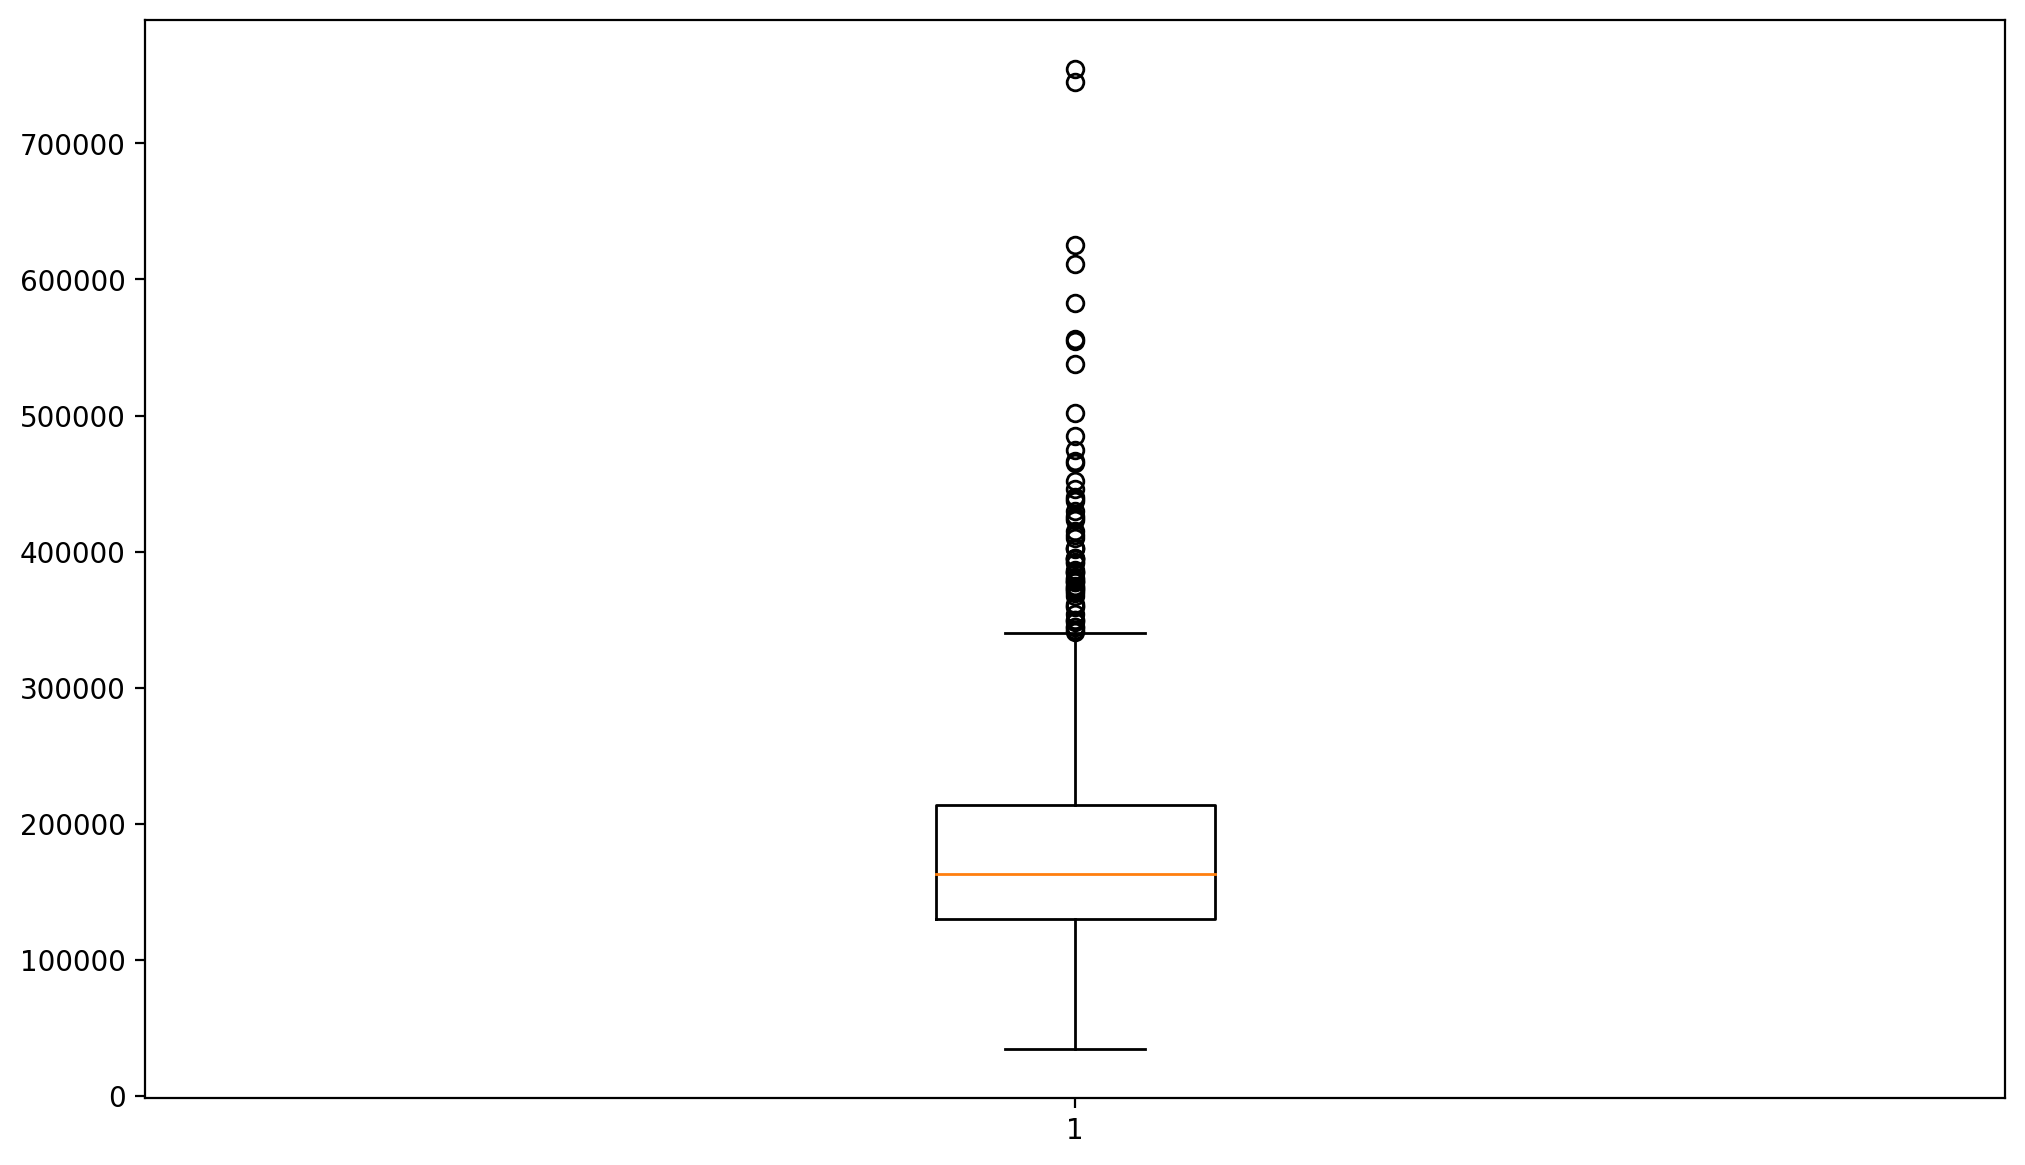

In [40]:
#see distribution of saleprices to see outliers
plt.boxplot(Houses['SalePrice'])

In [41]:
Q1 = Houses['SalePrice'].quantile(0.25)
Q3 = Houses['SalePrice'].quantile(0.75)
IQR = Q3 - Q1

Houses = Houses[pd.DataFrame(~((Houses['SalePrice'] < (Q1 - 1.5 * IQR)) |(Houses['SalePrice'] > (Q3 + 1.5 * IQR)))).any(axis=1)]
Houses.shape

(1399, 42)

{'whiskers': [<matplotlib.lines.Line2D at 0x7fece9244790>,
 'caps': [<matplotlib.lines.Line2D at 0x7fece9244cd0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fece92444f0>],
 'medians': [<matplotlib.lines.Line2D at 0x7fece9252250>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fece92524f0>],
 'means': []}

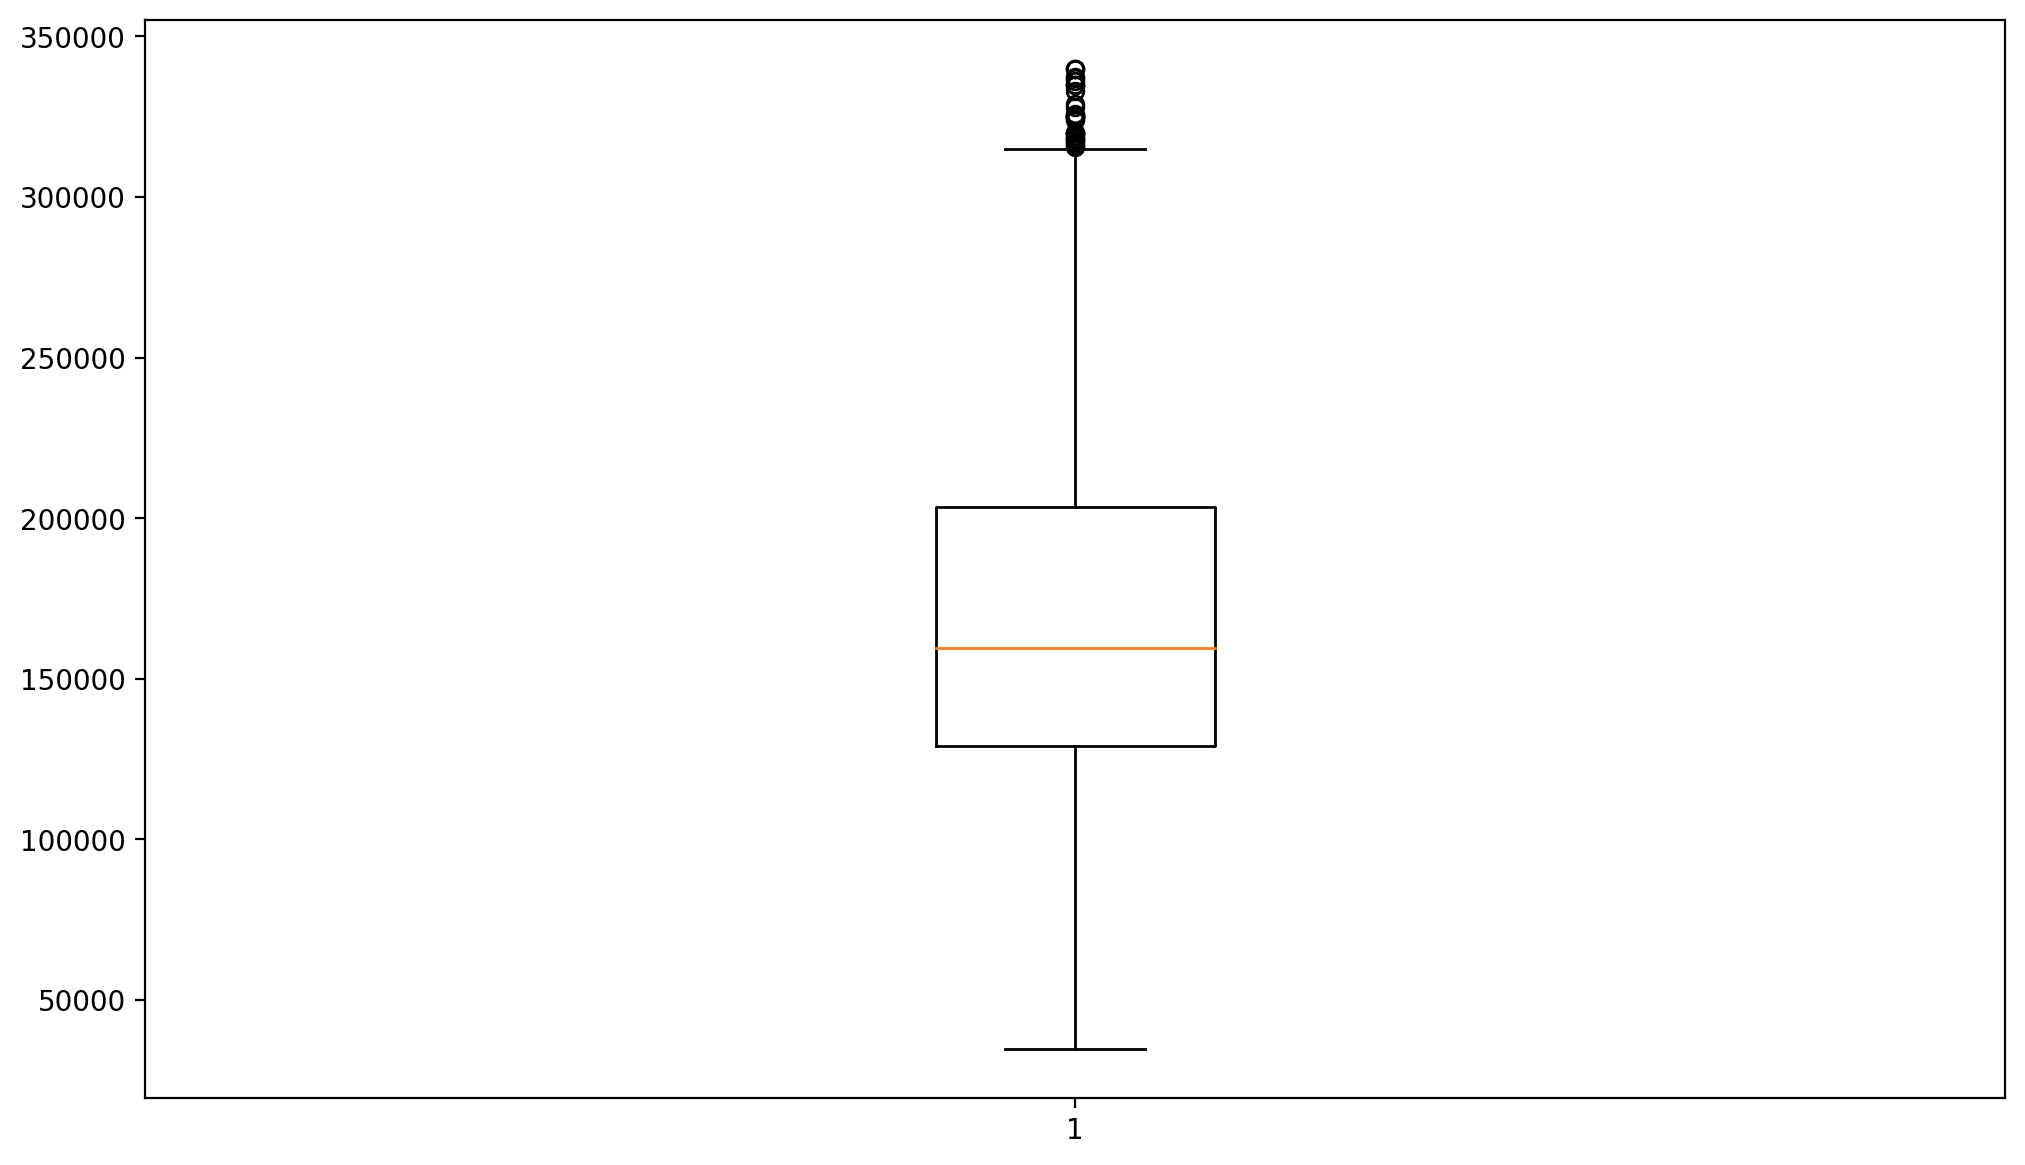

In [42]:
plt.boxplot(Houses['SalePrice'])

In [43]:
Houses.describe()

,LotFrontage,LotArea,OverallQual,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtUnfSF,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,Fireplaces,GarageArea,WoodDeckSF,OpenPorchSF,SalePrice
count,1143.000000,1399.000000,1399.000000,1399.000000,1399.000000,1392.000000,1399.000000,1399.000000,1399.000000,1399.000000,1399.000000,1399.000000,1399.000000,1399.000000,1399.000000,1399.000000,1399.000000,1399.000000,1399.000000,1399.000000
mean,69.058618,10155.280915,5.983560,1970.080772,1984.058613,90.176724,417.333095,559.461758,1132.247320,336.476054,1474.413867,0.410293,1.540386,0.370264,2.862044,0.583274,458.817012,89.621158,44.892066,170237.127234
std,23.813289,8324.834198,1.282272,30.009463,20.661160,159.492384,428.401771,429.378909,357.318243,421.440524,480.552421,0.514797,0.537219,0.500503,0.806081,0.631804,204.278673,121.798431,65.718951,59230.130817
min,21.000000,1300.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,334.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,34900.000000
25%,59.000000,7442.000000,5.000000,1953.000000,1966.000000,0.000000,0.000000,218.000000,870.500000,0.000000,1119.000000,0.000000,1.000000,0.000000,2.000000,0.000000,312.000000,0.000000,0.000000,129000.000000
50%,68.000000,9317.000000,6.000000,1971.000000,1992.000000,0.000000,370.000000,476.000000,1069.000000,0.000000,1437.000000,0.000000,2.000000,0.000000,3.000000,1.000000,471.000000,0.000000,22.000000,159500.000000
75%,80.000000,11316.500000,7.000000,1999.000000,2003.000000,144.000000,686.000000,807.000000,1346.500000,720.000000,1728.000000,1.000000,2.000000,1.000000,3.000000,1.000000,573.000000,165.000000,64.000000,203500.000000
max,313.000000,164660.000000,10.000000,2009.000000,2010.000000,1600.000000,5644.000000,2042.000000,4692.000000,1818.000000,5642.000000,3.000000,3.000000,2.000000,8.000000,3.000000,1418.000000,736.000000,547.000000,340000.000000


#### Find all numeric columns , with more than 50 percent filled with 0 values, if these column does not influence the analysis much we can delete them



In [44]:

Houses_num_column = Houses.select_dtypes(include=['float64', 'int64'])
for num_column in Houses_num_column:
     print("\n" + num_column)
     print(Houses[num_column].value_counts()/len(Houses))


LotFrontage
60.0     0.101501
70.0     0.050036
80.0     0.048606
50.0     0.040743
75.0     0.037169
           ...   
137.0    0.000715
140.0    0.000715
38.0     0.000715
118.0    0.000715
46.0     0.000715
Name: LotFrontage, Length: 107, dtype: float64

LotArea
7200     0.017870
9600     0.017155
6000     0.012152
8400     0.010007
9000     0.010007
           ...   
9490     0.000715
15578    0.000715
5784     0.000715
7879     0.000715
9717     0.000715
Name: LotArea, Length: 1017, dtype: float64

OverallQual
5     0.283774
6     0.267334
7     0.225876
8     0.104360
4     0.082916
9     0.014296
3     0.014296
10    0.003574
2     0.002144
1     0.001430
Name: OverallQual, dtype: float64

YearBuilt
2005    0.041458
2006    0.040743
2004    0.037169
2007    0.031451
2003    0.028592
          ...   
1911    0.000715
1917    0.000715
1892    0.000715
1872    0.000715
1905    0.000715
Name: YearBuilt, Length: 111, dtype: float64

YearRemodAdd
1950    0.127234
2006    0.060758
200

In [45]:
#removing the columns which has more than 50 percent 0 values and they are not useful for analysis
Houses = Houses.drop(['MasVnrArea','2ndFlrSF','BsmtFullBath','HalfBath','WoodDeckSF'],axis=1)
Houses.shape

(1399, 37)

In [46]:
Houses.head()

,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,Condition1,BldgType,HouseStyle,OverallQual,...,FullBath,BedroomAbvGr,KitchenQual,Fireplaces,GarageType,GarageFinish,GarageArea,OpenPorchSF,SaleCondition,SalePrice
0,RL,65.0,8450,Reg,Inside,CollgCr,Norm,1Fam,2Story,7,...,2,3,Gd,0,Attchd,RFn,548,61,Normal,208500
1,RL,80.0,9600,Reg,FR2,Veenker,Feedr,1Fam,1Story,6,...,2,3,TA,1,Attchd,RFn,460,0,Normal,181500
2,RL,68.0,11250,IR1,Inside,CollgCr,Norm,1Fam,2Story,7,...,2,3,Gd,1,Attchd,RFn,608,42,Normal,223500
3,RL,60.0,9550,IR1,Corner,Crawfor,Norm,1Fam,2Story,7,...,1,3,Gd,1,Detchd,Unf,642,35,Abnorml,140000
4,RL,84.0,14260,IR1,FR2,NoRidge,Norm,1Fam,2Story,8,...,2,4,Gd,1,Attchd,RFn,836,84,Normal,250000


In [47]:
Houses.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1399 entries, 0 to 1459
Data columns (total 37 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSZoning       1399 non-null   object 
 1   LotFrontage    1143 non-null   float64
 2   LotArea        1399 non-null   int64  
 3   LotShape       1399 non-null   object 
 4   LotConfig      1399 non-null   object 
 5   Neighborhood   1399 non-null   object 
 6   Condition1     1399 non-null   object 
 7   BldgType       1399 non-null   object 
 8   HouseStyle     1399 non-null   object 
 9   OverallQual    1399 non-null   int64  
 10  YearBuilt      1399 non-null   int64  
 11  YearRemodAdd   1399 non-null   int64  
 12  RoofStyle      1399 non-null   object 
 13  Exterior1st    1399 non-null   object 
 14  MasVnrType     1392 non-null   object 
 15  ExterQual      1399 non-null   object 
 16  ExterCond      1399 non-null   object 
 17  Foundation     1399 non-null   object 
 18  BsmtQual

##### After observing data frame, found out that small percentage of rows have null value, will be deleting those rows, as they will not be influencing the analysis



In [48]:
Houses.dropna(subset=['GarageType','GarageFinish','BsmtFinType1','BsmtFinType2','BsmtExposure','BsmtQual','MasVnrType'], inplace=True)
Houses.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1279 entries, 0 to 1459
Data columns (total 37 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSZoning       1279 non-null   object 
 1   LotFrontage    1038 non-null   float64
 2   LotArea        1279 non-null   int64  
 3   LotShape       1279 non-null   object 
 4   LotConfig      1279 non-null   object 
 5   Neighborhood   1279 non-null   object 
 6   Condition1     1279 non-null   object 
 7   BldgType       1279 non-null   object 
 8   HouseStyle     1279 non-null   object 
 9   OverallQual    1279 non-null   int64  
 10  YearBuilt      1279 non-null   int64  
 11  YearRemodAdd   1279 non-null   int64  
 12  RoofStyle      1279 non-null   object 
 13  Exterior1st    1279 non-null   object 
 14  MasVnrType     1279 non-null   object 
 15  ExterQual      1279 non-null   object 
 16  ExterCond      1279 non-null   object 
 17  Foundation     1279 non-null   object 
 18  BsmtQual

In [49]:
Houses['LotFrontage'].value_counts()

60.0     119
80.0      66
70.0      63
75.0      49
50.0      49
        ... 
174.0      1
56.0       1
140.0      1
38.0       1
46.0       1
Name: LotFrontage, Length: 104, dtype: int64

In [50]:
#imputing value of 0, as it can indicate there is no road connectivity to the house
Houses['LotFrontage']=Houses['LotFrontage'].fillna(0)

In [51]:
Houses.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1279 entries, 0 to 1459
Data columns (total 37 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSZoning       1279 non-null   object 
 1   LotFrontage    1279 non-null   float64
 2   LotArea        1279 non-null   int64  
 3   LotShape       1279 non-null   object 
 4   LotConfig      1279 non-null   object 
 5   Neighborhood   1279 non-null   object 
 6   Condition1     1279 non-null   object 
 7   BldgType       1279 non-null   object 
 8   HouseStyle     1279 non-null   object 
 9   OverallQual    1279 non-null   int64  
 10  YearBuilt      1279 non-null   int64  
 11  YearRemodAdd   1279 non-null   int64  
 12  RoofStyle      1279 non-null   object 
 13  Exterior1st    1279 non-null   object 
 14  MasVnrType     1279 non-null   object 
 15  ExterQual      1279 non-null   object 
 16  ExterCond      1279 non-null   object 
 17  Foundation     1279 non-null   object 
 18  BsmtQual

In [52]:
Houses.head()

,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,Condition1,BldgType,HouseStyle,OverallQual,...,FullBath,BedroomAbvGr,KitchenQual,Fireplaces,GarageType,GarageFinish,GarageArea,OpenPorchSF,SaleCondition,SalePrice
0,RL,65.0,8450,Reg,Inside,CollgCr,Norm,1Fam,2Story,7,...,2,3,Gd,0,Attchd,RFn,548,61,Normal,208500
1,RL,80.0,9600,Reg,FR2,Veenker,Feedr,1Fam,1Story,6,...,2,3,TA,1,Attchd,RFn,460,0,Normal,181500
2,RL,68.0,11250,IR1,Inside,CollgCr,Norm,1Fam,2Story,7,...,2,3,Gd,1,Attchd,RFn,608,42,Normal,223500
3,RL,60.0,9550,IR1,Corner,Crawfor,Norm,1Fam,2Story,7,...,1,3,Gd,1,Detchd,Unf,642,35,Abnorml,140000
4,RL,84.0,14260,IR1,FR2,NoRidge,Norm,1Fam,2Story,8,...,2,4,Gd,1,Attchd,RFn,836,84,Normal,250000


## 3.Data Preparation

Preparing the data for model building


In [53]:
Houses.columns

Index(['MSZoning', 'LotFrontage', 'LotArea', 'LotShape', 'LotConfig',
       'Neighborhood', 'Condition1', 'BldgType', 'HouseStyle', 'OverallQual',
       'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'Exterior1st', 'MasVnrType',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtUnfSF', 'HeatingQC',
       '1stFlrSF', 'GrLivArea', 'FullBath', 'BedroomAbvGr', 'KitchenQual',
       'Fireplaces', 'GarageType', 'GarageFinish', 'GarageArea', 'OpenPorchSF',
       'SaleCondition', 'SalePrice'],
      dtype='object')

In [55]:
#split the data into X (predictors) and y (response) 

X = Houses.loc[:,['MSZoning', 'LotFrontage', 'LotArea', 'LotShape', 'LotConfig',
       'Neighborhood', 'Condition1', 'BldgType', 'HouseStyle', 'OverallQual',
       'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'Exterior1st', 'MasVnrType',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtUnfSF', 'HeatingQC',
       '1stFlrSF', 'GrLivArea', 'FullBath', 'BedroomAbvGr', 'KitchenQual',
       'Fireplaces', 'GarageType', 'GarageFinish', 'GarageArea', 'OpenPorchSF',
       'SaleCondition']]
y = Houses['SalePrice']


In [58]:
#create dummy variables for categorical columns
houses_category_col = X.select_dtypes(include=['object'])
houses_category_col.head()
houses_dummies = pd.get_dummies(houses_category_col, drop_first=True)
houses_dummies.head()


,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR2,LotShape_IR3,LotShape_Reg,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,...,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageFinish_RFn,GarageFinish_Unf,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0,0,1,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,1,0
1,0,0,1,0,0,0,1,0,1,0,...,0,0,0,1,0,0,0,0,1,0
2,0,0,1,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
3,0,0,1,0,0,0,0,0,0,0,...,0,0,1,0,1,0,0,0,0,0
4,0,0,1,0,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,1,0


In [59]:
# drop categorical columns 
X = X.drop(list(houses_category_col.columns), axis=1)
# concat dummy variables with X
X = pd.concat([X, houses_dummies], axis=1)

In [60]:
# scaling the features 
from sklearn.preprocessing import scale

# storing column names in cols, since column names are lost after 
cols = X.columns
X = pd.DataFrame(scale(X))
X.columns = cols
X.columns

Index(['LotFrontage', 'LotArea', 'OverallQual', 'YearBuilt', 'YearRemodAdd',
       'BsmtFinSF1', 'BsmtUnfSF', '1stFlrSF', 'GrLivArea', 'FullBath',
       ...
       'GarageType_BuiltIn', 'GarageType_CarPort', 'GarageType_Detchd',
       'GarageFinish_RFn', 'GarageFinish_Unf', 'SaleCondition_AdjLand',
       'SaleCondition_Alloca', 'SaleCondition_Family', 'SaleCondition_Normal',
       'SaleCondition_Partial'],
      dtype='object', length=134)

In [61]:
# split into train and test set in the ratio of 70:30 for train and test respectively
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    train_size=0.7,
                                                    test_size = 0.3, random_state=100)

## 4.Model Building and Evaluation



### Ridge Regression



In [62]:
# list of alphas to tune  
alpha_values = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = alpha_values, 
                        scoring= 'neg_mean_absolute_error',  
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [63]:
# Printing the best hyperparameter alpha
print(model_cv.best_params_)

{'alpha': 100}


In [64]:
#Fitting Ridge model for alpha = 100 and printing coefficients which have been penalised
alpha = 100
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)
print(ridge.coef_)

[-6.28731694e+02  1.99689398e+03  1.06480117e+04  1.94436074e+03
  3.80260226e+03 -1.28884717e+03 -1.20704850e+03  1.61160067e+03
  8.67089887e+03  2.33640884e+03  3.11224972e+03  4.49754872e+03
  6.33049349e+03  2.03145684e+03 -4.20164146e+02 -8.93724648e+02
  2.49176572e+03 -1.18457962e+03 -3.61762729e+01 -1.37637974e+03
 -8.71369175e+02  9.43537578e+02 -1.76538819e+03 -2.77806325e+02
 -1.13621111e+03 -3.59278203e+02  6.06144753e+02  7.04953786e+02
  1.84282415e+03 -1.89926330e+03  3.24967908e+03 -3.80078818e+03
 -1.36070912e+03 -1.06545797e+03 -1.97344286e+03 -1.66752667e+03
 -2.71077665e+03  4.16138304e+02 -1.15422822e+01  5.32728722e+03
  5.56953814e+03 -2.02684059e+03 -1.63095744e+03 -1.26735006e+03
  2.36546009e+02  4.12807769e+03  2.84990144e+03  1.58529855e+03
  1.88722269e+03 -1.50837717e+03  8.48164600e+02  4.13624295e+02
 -1.10480045e+02 -8.16606490e+02 -5.43881356e+02 -5.51380212e+02
  1.54161343e+03 -1.51310386e+03 -2.22149391e+03 -4.12266023e+03
 -4.11986491e+03 -8.90778

In [66]:
# Lets calculate some metrics such as R2 score, RSS and RMSE
y_pred_train = ridge.predict(X_train)
y_pred_test = ridge.predict(X_test)

ridge_metric = []
r2_train = r2_score(y_train, y_pred_train)
print(r2_train)
ridge_metric.append(r2_train )

r2_test = r2_score(y_test, y_pred_test)
print(r2_test )
ridge_metric.append(r2_test)

rss_train = np.sum(np.square(y_train - y_pred_train))
print(rss_train)
ridge_metric.append(rss_train)

rss_test = np.sum(np.square(y_test - y_pred_test))
print(rss_test)
ridge_metric.append(rss_test)

mse_train = mean_squared_error(y_train, y_pred_train)
print(mse_train)
ridge_metric.append(mse_train**0.5)

mse_test = mean_squared_error(y_test, y_pred_test)
print(mse_test)
ridge_metric.append(mse_test**0.5)

0.8722941279788178
0.8228387945529166
385533632825.34467
221896937482.87708
430763835.5590443
577856608.0283257


### Lasso regression



In [68]:
lasso = Lasso()

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = alpha_values, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [69]:
# Printing the best hyperparameter alpha
print(model_cv.best_params_)

{'alpha': 500}


In [71]:
#Fitting Lasso model for alpha = 500 

alpha =500

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train, y_train) 

Lasso(alpha=500)

In [72]:
#coefficients which have been penalised
lasso.coef_

array([-3.09808862e+02,  1.40438784e+03,  1.40406247e+04,  2.84402426e+03,
        4.27167969e+03, -0.00000000e+00, -0.00000000e+00, -0.00000000e+00,
        1.28869636e+04,  1.07696347e+03,  1.14770716e+03,  4.34396140e+03,
        6.07481955e+03,  1.41600638e+03,  0.00000000e+00, -0.00000000e+00,
        4.00537523e+03, -0.00000000e+00,  0.00000000e+00, -1.27742879e+03,
       -6.16557557e+02,  9.21037460e+02, -7.51160313e+02, -0.00000000e+00,
       -6.91009768e+01, -0.00000000e+00,  2.00386371e+02,  7.43343903e+02,
        2.17193809e+03, -0.00000000e+00,  3.27809692e+03, -3.00358390e+03,
       -0.00000000e+00, -0.00000000e+00, -9.10305502e+02, -3.77999614e+02,
       -1.35443040e+03,  0.00000000e+00,  0.00000000e+00,  5.63359092e+03,
        6.73031384e+03, -1.00076424e+03, -1.33435942e+03, -1.51684148e+01,
        6.22873922e+01,  5.30258330e+03,  2.53304877e+03,  2.16801746e+03,
        1.52851397e+03, -7.43530368e+02,  1.01333467e+03,  1.13337264e+02,
        0.00000000e+00, -

In [73]:
# Lets calculate some metrics such as R2 score, RSS and RMSE

y_pred_train = lasso.predict(X_train)
y_pred_test = lasso.predict(X_test)

lasso_metric = []
r2_train = r2_score(y_train, y_pred_train)
print(r2_train)
lasso_metric.append(r2_train)

r2_test = r2_score(y_test, y_pred_test)
print(r2_test)
lasso_metric.append(r2_test)

rss_train = np.sum(np.square(y_train - y_pred_train))
print(rss_train)
lasso_metric.append(rss_train)

rss_test = np.sum(np.square(y_test - y_pred_test))
print(rss_test)
lasso_metric.append(rss_test)

mse_train = mean_squared_error(y_train, y_pred_train)
print(mse_train)
lasso_metric.append(mse_train**0.5)

mse_test = mean_squared_error(y_test, y_pred_test)
print(mse_test)
lasso_metric.append(mse_test**0.5)

0.8642687726772669
0.8275559200976439
409761527245.171
215988670436.17383
457834108.65382236
562470495.927536


In [74]:
# Creating a table which contain all the metrics

ridge_lasso_table = {'Metric': ['R2 Score (Train)','R2 Score (Test)','RSS (Train)','RSS (Test)',
                       'MSE (Train)','MSE (Test)'] }

ridge_lasso_metric = pd.DataFrame(ridge_lasso_table ,columns = ['Metric'] )

ridge_metric_column = pd.Series(ridge_metric, name = 'Ridge Regression')
lasso_metric_column = pd.Series(lasso_metric, name = 'Lasso Regression')

summary_table = pd.concat([ridge_lasso_metric, ridge_metric_column, lasso_metric_column], axis = 1)

summary_table

,Metric,Ridge Regression,Lasso Regression
0,R2 Score (Train),8.722941e-01,8.642688e-01
1,R2 Score (Test),8.228388e-01,8.275559e-01
2,RSS (Train),3.855336e+11,4.097615e+11
3,RSS (Test),2.218969e+11,2.159887e+11
4,MSE (Train),2.075485e+04,2.139706e+04
5,MSE (Test),2.403865e+04,2.371646e+04


## compare the coefficients [w.r.to](http://w.r.to) ridge and lasso regression



In [76]:
betas = pd.DataFrame(index=X.columns)
betas.rows = X.columns
 
betas['Ridge'] = ridge.coef_
betas['Lasso'] = lasso.coef_
pd.set_option('display.max_rows', None)
betas

,Ridge,Lasso
LotFrontage,-6.287317e+02,-309.808862
LotArea,1.996894e+03,1404.387842
OverallQual,1.064801e+04,14040.624682
YearBuilt,1.944361e+03,2844.024263
YearRemodAdd,3.802602e+03,4271.679689
BsmtFinSF1,-1.288847e+03,-0.000000
BsmtUnfSF,-1.207049e+03,-0.000000
1stFlrSF,1.611601e+03,-0.000000
GrLivArea,8.670899e+03,12886.963613
FullBath,2.336409e+03,1076.963467


#### Optimal value for lambda are

- For Ridge : 100
- For Lasso : 500

#### Variables which are significant in predicting the price of a house are

- OverallQual
- GrLivArea
- GarageArea
- Neighborhood
- YearRemodAdd
- FirePlaces
- BedroomAbvGr
- Exterior1st \(BrkFace\)
- MSZoning\(RL\)
- BsmtExposure \(Gd\)
- OpenPorchSF

####

#### How well these variables describe the price of a house?

These variables can describe the price with 82 percent  \(with reference to  ridge and lasso R2 score\)

